In [1]:
import pandas as pd
import numpy as np
from fastai.structured import *
from fastai.column_data import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score
from metrics import print_metrics_binary
import matplotlib.pyplot as plt
#from tqdm import TqdmSynchronisationWarning
np.set_printoptions(threshold=50, edgeitems=20)

/home/andreas/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory: 'uname': 'uname'
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [2]:
#print(torch.cuda.current_device())
#torch.cuda.set_device(1)

In [3]:
#warnings.filterwarnings("ignore", category=TqdmSynchronisationWarning)

In [4]:
train = pd.read_csv('./datasets/ihm/train_data_90.csv')
test = pd.read_csv('./datasets/ihm/test_data_90.csv')
val = pd.read_csv('./datasets/ihm/val_data_90.csv')
train_data = train.drop('Unnamed: 0', axis=1)
test_data = test.drop('Unnamed: 0', axis=1)
val_data = val.drop('Unnamed: 0', axis=1)

In [5]:
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)
test_data = test_data.reset_index().drop('index', axis=1)


def balance_dataset(df):
    num_died = len(train_data[train_data['Mortality'] == 1])
    num_survived = len(train_data[train_data['Mortality'] == 0])
    mortal_df = df[df['Mortality'] == 1].copy()
    counter = 0
    increased = 0
    while increased < num_died*4:
        if mortal_df.iloc[counter]['Mortality'] == 1:
            new_patient = mortal_df.iloc[counter].copy()
            df = df.append(new_patient, ignore_index=True)
            print(len(df[df['Mortality'] == 1]))
            increased = increased + 1
        counter = counter +1
        if counter == len(mortal_df): 
            counter = 0
        print(str(increased) +"/" + str(num_died))
    print(num_died+increased, num_survived)
    return df


train_data = balance_dataset(train_data)

1971
1/1970
1972
2/1970
1973
3/1970
1974
4/1970
1975
5/1970
1976
6/1970
1977
7/1970
1978
8/1970
1979
9/1970
1980
10/1970
1981
11/1970
1982
12/1970
1983
13/1970
1984
14/1970
1985
15/1970
1986
16/1970
1987
17/1970
1988
18/1970
1989
19/1970
1990
20/1970
1991
21/1970
1992
22/1970
1993
23/1970
1994
24/1970
1995
25/1970
1996
26/1970
1997
27/1970
1998
28/1970
1999
29/1970
2000
30/1970
2001
31/1970
2002
32/1970
2003
33/1970
2004
34/1970
2005
35/1970
2006
36/1970
2007
37/1970
2008
38/1970
2009
39/1970
2010
40/1970
2011
41/1970
2012
42/1970
2013
43/1970
2014
44/1970
2015
45/1970
2016
46/1970
2017
47/1970
2018
48/1970
2019
49/1970
2020
50/1970
2021
51/1970
2022
52/1970
2023
53/1970
2024
54/1970
2025
55/1970
2026
56/1970
2027
57/1970
2028
58/1970
2029
59/1970
2030
60/1970
2031
61/1970
2032
62/1970
2033
63/1970
2034
64/1970
2035
65/1970
2036
66/1970
2037
67/1970
2038
68/1970
2039
69/1970
2040
70/1970
2041
71/1970
2042
72/1970
2043
73/1970
2044
74/1970
2045
75/1970
2046
76/1970
2047
77/1970
2048
78/

2564
594/1970
2565
595/1970
2566
596/1970
2567
597/1970
2568
598/1970
2569
599/1970
2570
600/1970
2571
601/1970
2572
602/1970
2573
603/1970
2574
604/1970
2575
605/1970
2576
606/1970
2577
607/1970
2578
608/1970
2579
609/1970
2580
610/1970
2581
611/1970
2582
612/1970
2583
613/1970
2584
614/1970
2585
615/1970
2586
616/1970
2587
617/1970
2588
618/1970
2589
619/1970
2590
620/1970
2591
621/1970
2592
622/1970
2593
623/1970
2594
624/1970
2595
625/1970
2596
626/1970
2597
627/1970
2598
628/1970
2599
629/1970
2600
630/1970
2601
631/1970
2602
632/1970
2603
633/1970
2604
634/1970
2605
635/1970
2606
636/1970
2607
637/1970
2608
638/1970
2609
639/1970
2610
640/1970
2611
641/1970
2612
642/1970
2613
643/1970
2614
644/1970
2615
645/1970
2616
646/1970
2617
647/1970
2618
648/1970
2619
649/1970
2620
650/1970
2621
651/1970
2622
652/1970
2623
653/1970
2624
654/1970
2625
655/1970
2626
656/1970
2627
657/1970
2628
658/1970
2629
659/1970
2630
660/1970
2631
661/1970
2632
662/1970
2633
663/1970
2634
664/1970
2635
6

3138
1168/1970
3139
1169/1970
3140
1170/1970
3141
1171/1970
3142
1172/1970
3143
1173/1970
3144
1174/1970
3145
1175/1970
3146
1176/1970
3147
1177/1970
3148
1178/1970
3149
1179/1970
3150
1180/1970
3151
1181/1970
3152
1182/1970
3153
1183/1970
3154
1184/1970
3155
1185/1970
3156
1186/1970
3157
1187/1970
3158
1188/1970
3159
1189/1970
3160
1190/1970
3161
1191/1970
3162
1192/1970
3163
1193/1970
3164
1194/1970
3165
1195/1970
3166
1196/1970
3167
1197/1970
3168
1198/1970
3169
1199/1970
3170
1200/1970
3171
1201/1970
3172
1202/1970
3173
1203/1970
3174
1204/1970
3175
1205/1970
3176
1206/1970
3177
1207/1970
3178
1208/1970
3179
1209/1970
3180
1210/1970
3181
1211/1970
3182
1212/1970
3183
1213/1970
3184
1214/1970
3185
1215/1970
3186
1216/1970
3187
1217/1970
3188
1218/1970
3189
1219/1970
3190
1220/1970
3191
1221/1970
3192
1222/1970
3193
1223/1970
3194
1224/1970
3195
1225/1970
3196
1226/1970
3197
1227/1970
3198
1228/1970
3199
1229/1970
3200
1230/1970
3201
1231/1970
3202
1232/1970
3203
1233/1970
3204
1234/

3685
1715/1970
3686
1716/1970
3687
1717/1970
3688
1718/1970
3689
1719/1970
3690
1720/1970
3691
1721/1970
3692
1722/1970
3693
1723/1970
3694
1724/1970
3695
1725/1970
3696
1726/1970
3697
1727/1970
3698
1728/1970
3699
1729/1970
3700
1730/1970
3701
1731/1970
3702
1732/1970
3703
1733/1970
3704
1734/1970
3705
1735/1970
3706
1736/1970
3707
1737/1970
3708
1738/1970
3709
1739/1970
3710
1740/1970
3711
1741/1970
3712
1742/1970
3713
1743/1970
3714
1744/1970
3715
1745/1970
3716
1746/1970
3717
1747/1970
3718
1748/1970
3719
1749/1970
3720
1750/1970
3721
1751/1970
3722
1752/1970
3723
1753/1970
3724
1754/1970
3725
1755/1970
3726
1756/1970
3727
1757/1970
3728
1758/1970
3729
1759/1970
3730
1760/1970
3731
1761/1970
3732
1762/1970
3733
1763/1970
3734
1764/1970
3735
1765/1970
3736
1766/1970
3737
1767/1970
3738
1768/1970
3739
1769/1970
3740
1770/1970
3741
1771/1970
3742
1772/1970
3743
1773/1970
3744
1774/1970
3745
1775/1970
3746
1776/1970
3747
1777/1970
3748
1778/1970
3749
1779/1970
3750
1780/1970
3751
1781/

4232
2262/1970
4233
2263/1970
4234
2264/1970
4235
2265/1970
4236
2266/1970
4237
2267/1970
4238
2268/1970
4239
2269/1970
4240
2270/1970
4241
2271/1970
4242
2272/1970
4243
2273/1970
4244
2274/1970
4245
2275/1970
4246
2276/1970
4247
2277/1970
4248
2278/1970
4249
2279/1970
4250
2280/1970
4251
2281/1970
4252
2282/1970
4253
2283/1970
4254
2284/1970
4255
2285/1970
4256
2286/1970
4257
2287/1970
4258
2288/1970
4259
2289/1970
4260
2290/1970
4261
2291/1970
4262
2292/1970
4263
2293/1970
4264
2294/1970
4265
2295/1970
4266
2296/1970
4267
2297/1970
4268
2298/1970
4269
2299/1970
4270
2300/1970
4271
2301/1970
4272
2302/1970
4273
2303/1970
4274
2304/1970
4275
2305/1970
4276
2306/1970
4277
2307/1970
4278
2308/1970
4279
2309/1970
4280
2310/1970
4281
2311/1970
4282
2312/1970
4283
2313/1970
4284
2314/1970
4285
2315/1970
4286
2316/1970
4287
2317/1970
4288
2318/1970
4289
2319/1970
4290
2320/1970
4291
2321/1970
4292
2322/1970
4293
2323/1970
4294
2324/1970
4295
2325/1970
4296
2326/1970
4297
2327/1970
4298
2328/

4779
2809/1970
4780
2810/1970
4781
2811/1970
4782
2812/1970
4783
2813/1970
4784
2814/1970
4785
2815/1970
4786
2816/1970
4787
2817/1970
4788
2818/1970
4789
2819/1970
4790
2820/1970
4791
2821/1970
4792
2822/1970
4793
2823/1970
4794
2824/1970
4795
2825/1970
4796
2826/1970
4797
2827/1970
4798
2828/1970
4799
2829/1970
4800
2830/1970
4801
2831/1970
4802
2832/1970
4803
2833/1970
4804
2834/1970
4805
2835/1970
4806
2836/1970
4807
2837/1970
4808
2838/1970
4809
2839/1970
4810
2840/1970
4811
2841/1970
4812
2842/1970
4813
2843/1970
4814
2844/1970
4815
2845/1970
4816
2846/1970
4817
2847/1970
4818
2848/1970
4819
2849/1970
4820
2850/1970
4821
2851/1970
4822
2852/1970
4823
2853/1970
4824
2854/1970
4825
2855/1970
4826
2856/1970
4827
2857/1970
4828
2858/1970
4829
2859/1970
4830
2860/1970
4831
2861/1970
4832
2862/1970
4833
2863/1970
4834
2864/1970
4835
2865/1970
4836
2866/1970
4837
2867/1970
4838
2868/1970
4839
2869/1970
4840
2870/1970
4841
2871/1970
4842
2872/1970
4843
2873/1970
4844
2874/1970
4845
2875/

5326
3356/1970
5327
3357/1970
5328
3358/1970
5329
3359/1970
5330
3360/1970
5331
3361/1970
5332
3362/1970
5333
3363/1970
5334
3364/1970
5335
3365/1970
5336
3366/1970
5337
3367/1970
5338
3368/1970
5339
3369/1970
5340
3370/1970
5341
3371/1970
5342
3372/1970
5343
3373/1970
5344
3374/1970
5345
3375/1970
5346
3376/1970
5347
3377/1970
5348
3378/1970
5349
3379/1970
5350
3380/1970
5351
3381/1970
5352
3382/1970
5353
3383/1970
5354
3384/1970
5355
3385/1970
5356
3386/1970
5357
3387/1970
5358
3388/1970
5359
3389/1970
5360
3390/1970
5361
3391/1970
5362
3392/1970
5363
3393/1970
5364
3394/1970
5365
3395/1970
5366
3396/1970
5367
3397/1970
5368
3398/1970
5369
3399/1970
5370
3400/1970
5371
3401/1970
5372
3402/1970
5373
3403/1970
5374
3404/1970
5375
3405/1970
5376
3406/1970
5377
3407/1970
5378
3408/1970
5379
3409/1970
5380
3410/1970
5381
3411/1970
5382
3412/1970
5383
3413/1970
5384
3414/1970
5385
3415/1970
5386
3416/1970
5387
3417/1970
5388
3418/1970
5389
3419/1970
5390
3420/1970
5391
3421/1970
5392
3422/

5873
3903/1970
5874
3904/1970
5875
3905/1970
5876
3906/1970
5877
3907/1970
5878
3908/1970
5879
3909/1970
5880
3910/1970
5881
3911/1970
5882
3912/1970
5883
3913/1970
5884
3914/1970
5885
3915/1970
5886
3916/1970
5887
3917/1970
5888
3918/1970
5889
3919/1970
5890
3920/1970
5891
3921/1970
5892
3922/1970
5893
3923/1970
5894
3924/1970
5895
3925/1970
5896
3926/1970
5897
3927/1970
5898
3928/1970
5899
3929/1970
5900
3930/1970
5901
3931/1970
5902
3932/1970
5903
3933/1970
5904
3934/1970
5905
3935/1970
5906
3936/1970
5907
3937/1970
5908
3938/1970
5909
3939/1970
5910
3940/1970
5911
3941/1970
5912
3942/1970
5913
3943/1970
5914
3944/1970
5915
3945/1970
5916
3946/1970
5917
3947/1970
5918
3948/1970
5919
3949/1970
5920
3950/1970
5921
3951/1970
5922
3952/1970
5923
3953/1970
5924
3954/1970
5925
3955/1970
5926
3956/1970
5927
3957/1970
5928
3958/1970
5929
3959/1970
5930
3960/1970
5931
3961/1970
5932
3962/1970
5933
3963/1970
5934
3964/1970
5935
3965/1970
5936
3966/1970
5937
3967/1970
5938
3968/1970
5939
3969/

6420
4450/1970
6421
4451/1970
6422
4452/1970
6423
4453/1970
6424
4454/1970
6425
4455/1970
6426
4456/1970
6427
4457/1970
6428
4458/1970
6429
4459/1970
6430
4460/1970
6431
4461/1970
6432
4462/1970
6433
4463/1970
6434
4464/1970
6435
4465/1970
6436
4466/1970
6437
4467/1970
6438
4468/1970
6439
4469/1970
6440
4470/1970
6441
4471/1970
6442
4472/1970
6443
4473/1970
6444
4474/1970
6445
4475/1970
6446
4476/1970
6447
4477/1970
6448
4478/1970
6449
4479/1970
6450
4480/1970
6451
4481/1970
6452
4482/1970
6453
4483/1970
6454
4484/1970
6455
4485/1970
6456
4486/1970
6457
4487/1970
6458
4488/1970
6459
4489/1970
6460
4490/1970
6461
4491/1970
6462
4492/1970
6463
4493/1970
6464
4494/1970
6465
4495/1970
6466
4496/1970
6467
4497/1970
6468
4498/1970
6469
4499/1970
6470
4500/1970
6471
4501/1970
6472
4502/1970
6473
4503/1970
6474
4504/1970
6475
4505/1970
6476
4506/1970
6477
4507/1970
6478
4508/1970
6479
4509/1970
6480
4510/1970
6481
4511/1970
6482
4512/1970
6483
4513/1970
6484
4514/1970
6485
4515/1970
6486
4516/

6967
4997/1970
6968
4998/1970
6969
4999/1970
6970
5000/1970
6971
5001/1970
6972
5002/1970
6973
5003/1970
6974
5004/1970
6975
5005/1970
6976
5006/1970
6977
5007/1970
6978
5008/1970
6979
5009/1970
6980
5010/1970
6981
5011/1970
6982
5012/1970
6983
5013/1970
6984
5014/1970
6985
5015/1970
6986
5016/1970
6987
5017/1970
6988
5018/1970
6989
5019/1970
6990
5020/1970
6991
5021/1970
6992
5022/1970
6993
5023/1970
6994
5024/1970
6995
5025/1970
6996
5026/1970
6997
5027/1970
6998
5028/1970
6999
5029/1970
7000
5030/1970
7001
5031/1970
7002
5032/1970
7003
5033/1970
7004
5034/1970
7005
5035/1970
7006
5036/1970
7007
5037/1970
7008
5038/1970
7009
5039/1970
7010
5040/1970
7011
5041/1970
7012
5042/1970
7013
5043/1970
7014
5044/1970
7015
5045/1970
7016
5046/1970
7017
5047/1970
7018
5048/1970
7019
5049/1970
7020
5050/1970
7021
5051/1970
7022
5052/1970
7023
5053/1970
7024
5054/1970
7025
5055/1970
7026
5056/1970
7027
5057/1970
7028
5058/1970
7029
5059/1970
7030
5060/1970
7031
5061/1970
7032
5062/1970
7033
5063/

7514
5544/1970
7515
5545/1970
7516
5546/1970
7517
5547/1970
7518
5548/1970
7519
5549/1970
7520
5550/1970
7521
5551/1970
7522
5552/1970
7523
5553/1970
7524
5554/1970
7525
5555/1970
7526
5556/1970
7527
5557/1970
7528
5558/1970
7529
5559/1970
7530
5560/1970
7531
5561/1970
7532
5562/1970
7533
5563/1970
7534
5564/1970
7535
5565/1970
7536
5566/1970
7537
5567/1970
7538
5568/1970
7539
5569/1970
7540
5570/1970
7541
5571/1970
7542
5572/1970
7543
5573/1970
7544
5574/1970
7545
5575/1970
7546
5576/1970
7547
5577/1970
7548
5578/1970
7549
5579/1970
7550
5580/1970
7551
5581/1970
7552
5582/1970
7553
5583/1970
7554
5584/1970
7555
5585/1970
7556
5586/1970
7557
5587/1970
7558
5588/1970
7559
5589/1970
7560
5590/1970
7561
5591/1970
7562
5592/1970
7563
5593/1970
7564
5594/1970
7565
5595/1970
7566
5596/1970
7567
5597/1970
7568
5598/1970
7569
5599/1970
7570
5600/1970
7571
5601/1970
7572
5602/1970
7573
5603/1970
7574
5604/1970
7575
5605/1970
7576
5606/1970
7577
5607/1970
7578
5608/1970
7579
5609/1970
7580
5610/

8061
6091/1970
8062
6092/1970
8063
6093/1970
8064
6094/1970
8065
6095/1970
8066
6096/1970
8067
6097/1970
8068
6098/1970
8069
6099/1970
8070
6100/1970
8071
6101/1970
8072
6102/1970
8073
6103/1970
8074
6104/1970
8075
6105/1970
8076
6106/1970
8077
6107/1970
8078
6108/1970
8079
6109/1970
8080
6110/1970
8081
6111/1970
8082
6112/1970
8083
6113/1970
8084
6114/1970
8085
6115/1970
8086
6116/1970
8087
6117/1970
8088
6118/1970
8089
6119/1970
8090
6120/1970
8091
6121/1970
8092
6122/1970
8093
6123/1970
8094
6124/1970
8095
6125/1970
8096
6126/1970
8097
6127/1970
8098
6128/1970
8099
6129/1970
8100
6130/1970
8101
6131/1970
8102
6132/1970
8103
6133/1970
8104
6134/1970
8105
6135/1970
8106
6136/1970
8107
6137/1970
8108
6138/1970
8109
6139/1970
8110
6140/1970
8111
6141/1970
8112
6142/1970
8113
6143/1970
8114
6144/1970
8115
6145/1970
8116
6146/1970
8117
6147/1970
8118
6148/1970
8119
6149/1970
8120
6150/1970
8121
6151/1970
8122
6152/1970
8123
6153/1970
8124
6154/1970
8125
6155/1970
8126
6156/1970
8127
6157/

8608
6638/1970
8609
6639/1970
8610
6640/1970
8611
6641/1970
8612
6642/1970
8613
6643/1970
8614
6644/1970
8615
6645/1970
8616
6646/1970
8617
6647/1970
8618
6648/1970
8619
6649/1970
8620
6650/1970
8621
6651/1970
8622
6652/1970
8623
6653/1970
8624
6654/1970
8625
6655/1970
8626
6656/1970
8627
6657/1970
8628
6658/1970
8629
6659/1970
8630
6660/1970
8631
6661/1970
8632
6662/1970
8633
6663/1970
8634
6664/1970
8635
6665/1970
8636
6666/1970
8637
6667/1970
8638
6668/1970
8639
6669/1970
8640
6670/1970
8641
6671/1970
8642
6672/1970
8643
6673/1970
8644
6674/1970
8645
6675/1970
8646
6676/1970
8647
6677/1970
8648
6678/1970
8649
6679/1970
8650
6680/1970
8651
6681/1970
8652
6682/1970
8653
6683/1970
8654
6684/1970
8655
6685/1970
8656
6686/1970
8657
6687/1970
8658
6688/1970
8659
6689/1970
8660
6690/1970
8661
6691/1970
8662
6692/1970
8663
6693/1970
8664
6694/1970
8665
6695/1970
8666
6696/1970
8667
6697/1970
8668
6698/1970
8669
6699/1970
8670
6700/1970
8671
6701/1970
8672
6702/1970
8673
6703/1970
8674
6704/

9155
7185/1970
9156
7186/1970
9157
7187/1970
9158
7188/1970
9159
7189/1970
9160
7190/1970
9161
7191/1970
9162
7192/1970
9163
7193/1970
9164
7194/1970
9165
7195/1970
9166
7196/1970
9167
7197/1970
9168
7198/1970
9169
7199/1970
9170
7200/1970
9171
7201/1970
9172
7202/1970
9173
7203/1970
9174
7204/1970
9175
7205/1970
9176
7206/1970
9177
7207/1970
9178
7208/1970
9179
7209/1970
9180
7210/1970
9181
7211/1970
9182
7212/1970
9183
7213/1970
9184
7214/1970
9185
7215/1970
9186
7216/1970
9187
7217/1970
9188
7218/1970
9189
7219/1970
9190
7220/1970
9191
7221/1970
9192
7222/1970
9193
7223/1970
9194
7224/1970
9195
7225/1970
9196
7226/1970
9197
7227/1970
9198
7228/1970
9199
7229/1970
9200
7230/1970
9201
7231/1970
9202
7232/1970
9203
7233/1970
9204
7234/1970
9205
7235/1970
9206
7236/1970
9207
7237/1970
9208
7238/1970
9209
7239/1970
9210
7240/1970
9211
7241/1970
9212
7242/1970
9213
7243/1970
9214
7244/1970
9215
7245/1970
9216
7246/1970
9217
7247/1970
9218
7248/1970
9219
7249/1970
9220
7250/1970
9221
7251/

9702
7732/1970
9703
7733/1970
9704
7734/1970
9705
7735/1970
9706
7736/1970
9707
7737/1970
9708
7738/1970
9709
7739/1970
9710
7740/1970
9711
7741/1970
9712
7742/1970
9713
7743/1970
9714
7744/1970
9715
7745/1970
9716
7746/1970
9717
7747/1970
9718
7748/1970
9719
7749/1970
9720
7750/1970
9721
7751/1970
9722
7752/1970
9723
7753/1970
9724
7754/1970
9725
7755/1970
9726
7756/1970
9727
7757/1970
9728
7758/1970
9729
7759/1970
9730
7760/1970
9731
7761/1970
9732
7762/1970
9733
7763/1970
9734
7764/1970
9735
7765/1970
9736
7766/1970
9737
7767/1970
9738
7768/1970
9739
7769/1970
9740
7770/1970
9741
7771/1970
9742
7772/1970
9743
7773/1970
9744
7774/1970
9745
7775/1970
9746
7776/1970
9747
7777/1970
9748
7778/1970
9749
7779/1970
9750
7780/1970
9751
7781/1970
9752
7782/1970
9753
7783/1970
9754
7784/1970
9755
7785/1970
9756
7786/1970
9757
7787/1970
9758
7788/1970
9759
7789/1970
9760
7790/1970
9761
7791/1970
9762
7792/1970
9763
7793/1970
9764
7794/1970
9765
7795/1970
9766
7796/1970
9767
7797/1970
9768
7798/

In [6]:
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)
test_data = test_data.reset_index().drop('index', axis=1)

In [7]:
print(len(train_data[train_data['Mortality'] == 1]))
print(len(train_data[train_data['Mortality'] == 0]))

9850
12553


In [8]:
train_size = len(train_data)
train_data = train_data.append(val_data)


print(train_size)
print(len(train_data))
val_idx = list(range(train_size, len(train_data)))

22403
25591


In [9]:
cat_vars = ['Capillary refill rate', 'Glascow coma scale eye opening' ,'Glascow coma scale motor response','Glascow coma scale total', 'Glascow coma scale verbal response']

all_cat_vars = []
counter = 0
for cat in cat_vars:
    for i in range(0,90):
        all_cat_vars.append(cat+str(i))

all_cat_vars.append('Length')
for v in all_cat_vars: train_data[v] = train_data[v].astype('category').cat.as_ordered()
for v in all_cat_vars: test_data[v] = test_data[v].astype('category').cat.as_ordered()

cat_sz = [(c, len(train_data[c].cat.categories)+1) for c in all_cat_vars]

print(cat_sz)

emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

[('Capillary refill rate0', 3), ('Capillary refill rate1', 3), ('Capillary refill rate2', 3), ('Capillary refill rate3', 3), ('Capillary refill rate4', 3), ('Capillary refill rate5', 3), ('Capillary refill rate6', 3), ('Capillary refill rate7', 3), ('Capillary refill rate8', 3), ('Capillary refill rate9', 3), ('Capillary refill rate10', 3), ('Capillary refill rate11', 3), ('Capillary refill rate12', 3), ('Capillary refill rate13', 3), ('Capillary refill rate14', 3), ('Capillary refill rate15', 3), ('Capillary refill rate16', 3), ('Capillary refill rate17', 3), ('Capillary refill rate18', 3), ('Capillary refill rate19', 3), ('Capillary refill rate20', 3), ('Capillary refill rate21', 3), ('Capillary refill rate22', 3), ('Capillary refill rate23', 3), ('Capillary refill rate24', 3), ('Capillary refill rate25', 3), ('Capillary refill rate26', 3), ('Capillary refill rate27', 3), ('Capillary refill rate28', 3), ('Capillary refill rate29', 3), ('Capillary refill rate30', 3), ('Capillary refil

In [10]:
test_data.head()

,Hours0,Capillary refill rate0,Diastolic blood pressure0,Fraction inspired oxygen0,Glascow coma scale eye opening0,Glascow coma scale motor response0,Glascow coma scale total0,Glascow coma scale verbal response0,Glucose0,Heart Rate0,...,Height89,Mean blood pressure89,Oxygen saturation89,Respiratory rate89,Systolic blood pressure89,Temperature89,Weight89,pH89,Mortality,Length
0,0.433333,0.0,49.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,81.0,...,170.0,64.333298,98.0,16.0,99.0,36.333334,81.000000,7.47,1,49
1,0.078333,0.0,38.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,65.0,...,170.0,82.000000,98.0,10.0,169.0,37.055599,64.900002,5.00,0,69
2,0.700000,0.0,43.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,70.0,...,170.0,54.666698,97.0,25.0,100.0,36.333334,81.000000,7.40,0,48
3,0.316944,0.0,64.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,67.0,...,170.0,67.000000,94.0,17.0,109.0,37.700001,90.199997,7.37,0,86
4,2.089167,0.0,35.0,0.21,To Speech,Localizes Pain,10.0,Incomprehensible sounds,128.0,96.0,...,170.0,69.000000,99.0,13.0,105.0,35.222223,83.000000,7.40,0,56


In [11]:
print(len(train_data[train_data['Mortality'] == 1]))
print(len(train_data[train_data['Mortality'] == 0]))

10283
15308


In [12]:
print(len(train_data.columns))
print(len(test_data.columns))

1622
1622


In [13]:
df, y, nas, mapper = proc_df(train_data, 'Mortality', do_scale=True)
df_test, y_test, nas_test, mapper_test = proc_df(test_data, 'Mortality', do_scale=True, mapper=mapper, na_dict=nas) 

md = ColumnarModelData.from_data_frame('./datasets/ihm/', val_idx, df, y.astype(np.float32), cat_flds=all_cat_vars, bs=32,
                                       test_df=df_test)

In [14]:
m = md.get_learner(emb_szs, len(df.columns)-len(all_cat_vars),
                   0.4, 1, [2000,1000,500], [0.5,0.4, 0.3], y_range=[0,1], crit = torch.nn.functional.binary_cross_entropy)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 63%|██████▎   | 443/701 [00:34<00:20, 12.76it/s, loss=2.53] 

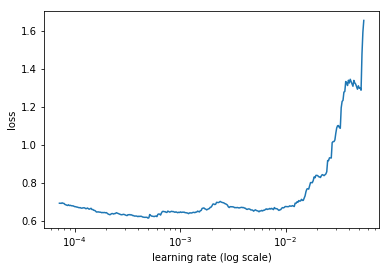

In [15]:
m.lr_find()
m.sched.plot(100)


In [16]:
lr = 0.00005


In [17]:
lrs = [lr/9, lr/6, lr/3]

In [18]:
m.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  9%|▉         | 62/701 [00:04<00:50, 12.76it/s, loss=0.752]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/andreas/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/andreas/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/andreas/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss                               
    0      0.545639   0.499199  
    1      0.51527    0.454489                               
    2      0.499394   0.468865                               
    3      0.47168    0.476981                               
    4      0.448066   0.456394                               
    5      0.419616   0.457278                               
    6      0.414843   0.456032                               



[array([0.45603])]

In [19]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2274  588]
 [  95  279]]
accuracy = 0.788937
precision class 0 = 0.9598987
precision class 1 = 0.3217993
recall class 0 = 0.7945493
recall calss 1 = 0.7459893
AUC of ROC = 0.7702692855301069
AUC of PRC = 0.5485729219604396
min(+P, Se) = 0.3217993079584775


In [20]:
m.fit(lrs, 1, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.427692   0.450479  



[array([0.45048])]

In [21]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2283  579]
 [  96  278]]
accuracy = 0.79140913
precision class 0 = 0.95964694
precision class 1 = 0.3243874
recall class 0 = 0.7976939
recall calss 1 = 0.7433155
AUC of ROC = 0.77050471417841
AUC of PRC = 0.5486845802781963
min(+P, Se) = 0.32438739789964993


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 63%|██████▎   | 440/701 [00:33<00:19, 13.23it/s, loss=1.51] 

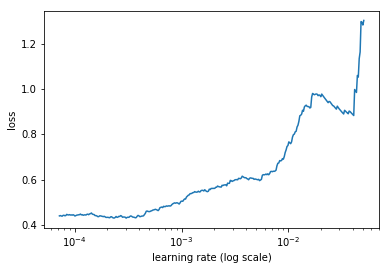

In [22]:
m.lr_find()
m.sched.plot(100)

In [23]:
m.fit(lrs, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 12%|█▏        | 86/701 [00:06<00:47, 12.92it/s, loss=0.405]

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/andreas/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/andreas/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/andreas/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss                               
    0      0.410258   0.45033   
    1      0.414969   0.447176                               
    2      0.409748   0.451895                               



[array([0.4519])]

In [24]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2282  580]
 [  99  275]]
accuracy = 0.79017305
precision class 0 = 0.9584208
precision class 1 = 0.32163742
recall class 0 = 0.7973445
recall calss 1 = 0.7352941
AUC of ROC = 0.7663193159863526
AUC of PRC = 0.5437624348201754
min(+P, Se) = 0.3216374269005848


In [25]:
m.fit(0.0001, 2, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.431253   0.435027  
    1      0.375753   0.424626                               
    2      0.363555   0.436172                               
    3      0.329337   0.429091                               



[array([0.42909])]

In [26]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2365  497]
 [ 117  257]]
accuracy = 0.8102596
precision class 0 = 0.9528606
precision class 1 = 0.3408488
recall class 0 = 0.8263452
recall calss 1 = 0.6871658
AUC of ROC = 0.7567554942693677
AUC of PRC = 0.5320851648019764
min(+P, Se) = 0.34084880636604775
